In [1]:
import dlib

In [2]:
dlib.__version__

'19.21.1'

In [4]:
#Facial landmarks with dlib, OpenCV, and Python
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

In [5]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [7]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
#

In [30]:
 #construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--shape-predictor", required=True,
	help="path to facial landmark predictor")
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
#parser.parse_args('--sum 7 -1 42'.split() )
#args = vars(ap.parse_args())

_StoreAction(option_strings=['-i', '--image'], dest='image', nargs=None, const=None, default=None, type=None, choices=None, help='path to input image', metavar=None)

In [32]:
ap.parse_args('--sum 7 -1 42'.split())

usage: ipykernel_launcher.py [-h] -p SHAPE_PREDICTOR -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -p/--shape-predictor, -i/--image


SystemExit: 2

In [24]:
args = parse_args('dir1 dir2 foobar'.split())
print(args)

usage: ipykernel_launcher.py [-h] [-p SHAPE_PREDICTOR] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

In [25]:
import sys
print(sys.argv)

['C:\\Users\\91810\\anaconda3\\lib\\site-packages\\ipykernel_launcher.py', '-i', 'image', '-p', 'proto', '-m', 'amodel']


In [26]:
args = argparse.Namespace(foo='bar', x=2)
#args=argparse.ArgumentParser()

In [33]:
datFile =  r"C:\Users\91810\Desktop\iha internship\shape_predictor_68_face_landmarks.dat"

In [35]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(datFile)

In [41]:
import matplotlib.pyplot as plt

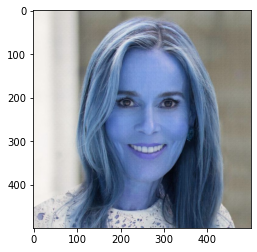

In [45]:
image = cv2.imread(r'C:\Users\91810\Desktop\iha internship\women1.jpg')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)
plt.imshow(image)

In [89]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)

-1

In [92]:
import collections
 
try:
    from collections import OrderedDict
except ImportError:
    OrderedDict = dict

In [93]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 48)),
	("nose", (27, 35)),
	("jaw", (0, 17))
])

In [94]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
	# create two copies of the input image -- one for the
	# overlay and one for the final output image
	overlay = image.copy()
	output = image.copy()
	# if the colors list is None, initialize it with a unique
	# color for each facial landmark region
	if colors is None:
		colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
			(168, 100, 168), (158, 163, 32),
			(163, 38, 32), (180, 42, 220)]

In [108]:
# loop over the facial landmark regions individually
alpha=0.75
output = image.copy()
if colors is None:
    colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),(168, 100, 168), (158, 163, 32),(163, 38, 32), (180, 42, 220),(12,133,234)]
overlay = image.copy()
for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
		# grab the (x, y)-coordinates associated with the
		# face landmark
	(j, k) = FACIAL_LANDMARKS_IDXS[name]
	pts = shape[j:k]
		# check if are supposed to draw the jawline
	if name == "jaw":
			# since the jawline is a non-enclosed facial region,
			# just draw lines between the (x, y)-coordinates
		for l in range(1, len(pts)):
			ptA = tuple(pts[l - 1])
			ptB = tuple(pts[l])
			cv2.line(overlay, ptA, ptB, colors[i], 2)
		# otherwise, compute the convex hull of the facial
		# landmark coordinates points and display it
	else:
		hull = cv2.convexHull(pts)
		cv2.drawContours(overlay, [hull], -1, colors[i], -1)
        	# apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
	# return the output image
    return output

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [111]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
# create two copies of the input image -- one for the
# overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()
# if the colors list is None, initialize it with a unique
# color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),(168, 100, 168), (158, 163, 32),(163, 38, 32), (180, 42, 220)]
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
# grab he (x, y)-coordinates associated with the
# face landmark
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]
        # check if are supposed to draw the jawline
        if name == "jaw":
        # since the jawline is a non-enclosed facial region,
        # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)
                # otherise, compute the convex hull of the facial
                # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)
            # apply the transparent overlay
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
        # return the output image
        return output